### Compact finite difference demonstration

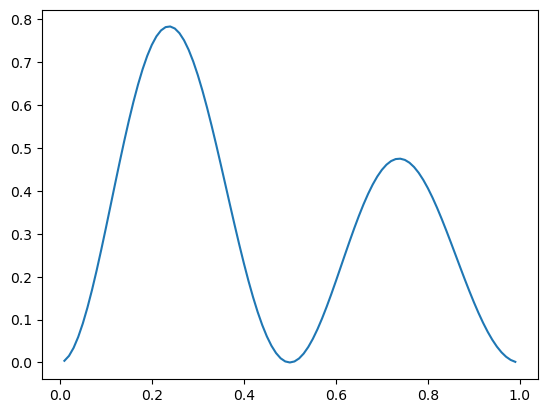

In [11]:
# Demonstration of compact finite differences for derivatives and filtering
#
# UC Berkeley Math 228B, Per-Olof Persson <persson@berkeley.edu>

m = 99
h = 1 / (m+1)
x = h * (1:m)
u = @. sin(2π*x)^2 * exp(-x)

using PyPlot

plot(x, u);

In [12]:
using LinearAlgebra
LHS = SymTridiagonal(ones(m), ones(m-1)/4);
RHS = (3 / 4h) * Tridiagonal(-ones(m-1), zeros(m), ones(m-1));

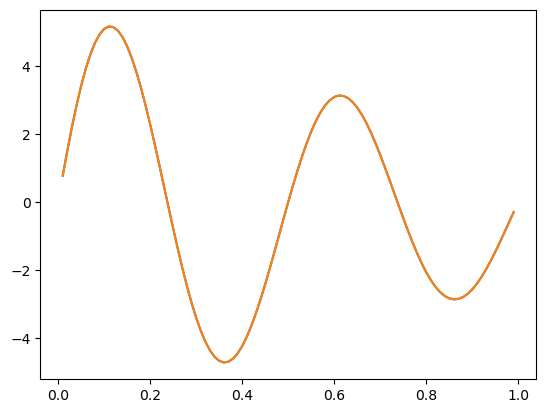

8.08972021104637e-6

In [13]:
du = LHS \ (RHS * u)
du_exact = @. exp(-x) * sin(2π*x) * (4 * cos(2π*x) * π - sin(2π*x))
du - du_exact
plot(x, [du du_exact])
maximum(abs.(du - du_exact))

In [14]:
### Check 4th order convergence (using m = 49 and m = 99)

1.29e-4 / 8.0897e-6

15.946203196657477

### Filtering

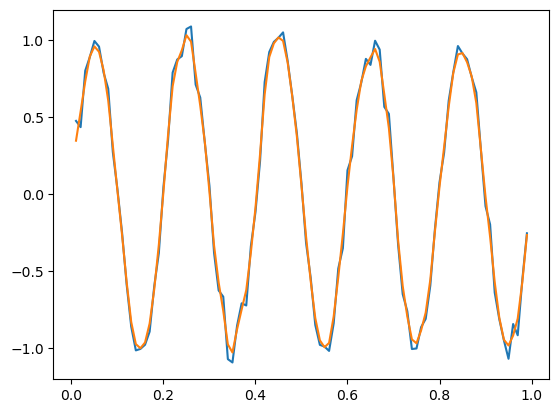

In [15]:
α = 0

LHS = SymTridiagonal(ones(m), α*ones(m-1));
RHS = (1/2 + α) * SymTridiagonal(ones(m), ones(m-1)/2);

u = sin.(5*2π*x) + 0.1 * randn(size(x))   # Smooth + noise
u_filt = LHS \ (RHS * u)

plot(x, [u u_filt]);